# Cogs 118a Homework 3: 
### Broderick Higby





## Q1: Convex

$ f(a) $ = convex


$ f(b) $ = non-convex


$ f(c) $ = convex


$ f(d) $ = non-convex


$ f(e) $ = convex


$ f(f) $ = non-convex

## Q2 Single Variable Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
# Import packages and load data
X_and_Y = np.load('./q2-least-square.npy')
X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)

### 2.1: 2D Scatterplot

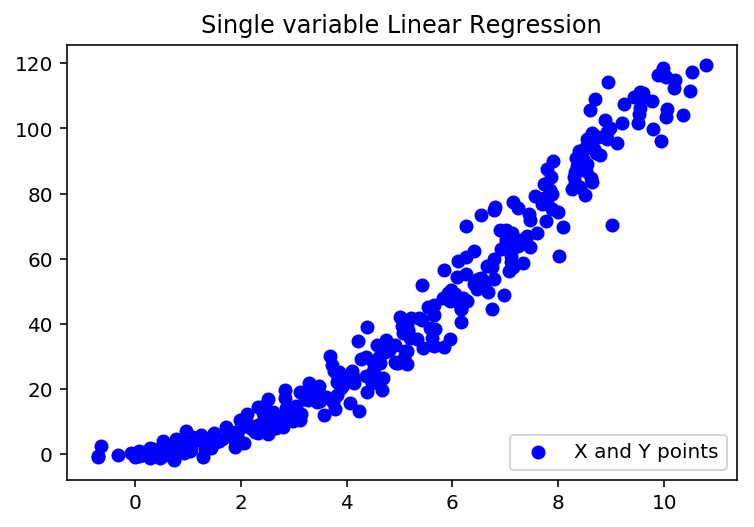

In [3]:
# TODO: Plot the a scatter graph of data.
plt.scatter(X, Y, color='b', label='X and Y points')
plt.legend(loc = 'lower right')
plt.title("Single variable Linear Regression")
plt.show()

### 2.2: Compute the Least Square Line Using the Closed Form (Example Code)

In [4]:
from numpy.linalg import inv
from numpy import dot, multiply, matrix, hstack, ones, reshape
# You might find the following functions useful: np.matrix, np.hstack, np.ones, reshape, dot
# Compute the least square line over the given data
# Assume Y = w0 + w1 * X = (w0, w1).(1, X) = W.X1
square_X = np.hstack((np.ones((len(X),1)), (np.matrix(X)).T))

W = dot(dot(inv(dot(square_X.T,square_X)),square_X.T),Y)


w0, w1 = W[0,0], W[0,1]
# least_squares_Y = w0 + w1 * square_X
# W_X1 = dot(dot(w0,w1),square_X)
# w0, w1 = W_X1[0,0], W_X1[0,1]

print('Y = {:.2f} + {:.2f}*X'.format(w0, w1))

Y = -15.47 + 11.61*X


### 2.3: 2D Scatterplot & the Estimated Least Square Line

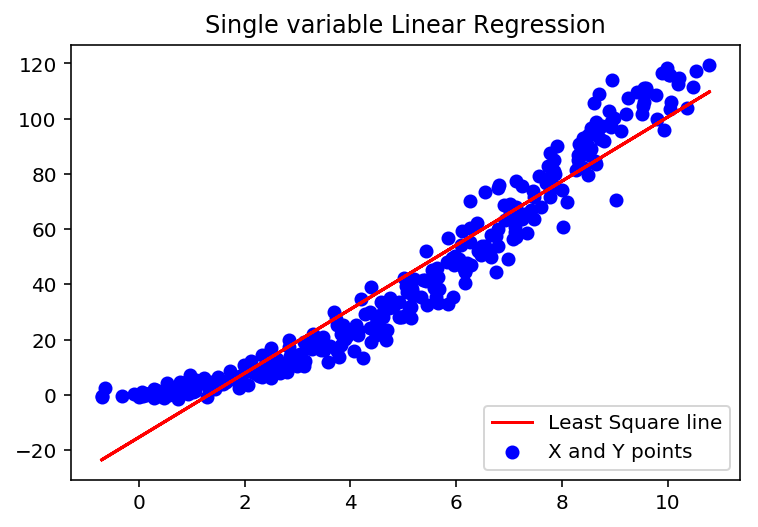

In [5]:
# TODO 3.  Plot the the estimated least square line on top of the scatter plot in (2).  
# The scatterplot and the line should be in the same figure.

plt.scatter(X, Y, color='b', label='X and Y points')
plt.plot(X, w0 + w1 * X, 'r', label='Least Square line')

plt.title("Single variable Linear Regression")
plt.legend(loc = 'lower right')
plt.show()

### 2.4: Compute the Least Square Parabola Using the Closed Form

In [6]:
# TODO 4. Compute the least square parabola over the given data
# Assume Y = w0 + w1 * X + w2 * X^2 = (w0, w1, w2).(1, X, X^2) = W.X2
X = X.reshape(300,1)
# Y = Y.reshape(300,1)
X2d = np.hstack((np.ones((len(X), 1)), (np.matrix(X)), (np.matrix(np.square(X)))))
W2d = dot(dot(inv(dot(X2d.T,X2d)),X2d.T),Y)
print(X2d.shape)
print(W2d.shape)
w0, w1, w2 = W2d[0,0], W2d[1,0], W2d[2,0]
print('Y = {:.2f} + {:.2f}*X + {:.2f}*X^2'.format(w0, w1, w2))

(300, 3)
(1, 3)


IndexError: index 1 is out of bounds for axis 0 with size 1

### 2.5: 2D Scatterplot & the Estimated Parabola

In [ ]:
# TODO 5.  Plot the the estimated parabola on top of the scatter plot in (2). 
# The scatter plot and the parabola should be in the same figure
# x1 = np.linspace(300,3)
# parabola = np.polyfit(X,W,2)

x_parabola = (w0 + dot(w1, X2d[:,1]) + dot(w2,X2d[:,2]))
plt.scatter(X,Y, color='b', label='X and Y points')
plt.plot(X, x_parabola, 'r', label='Least Square Line')
plt.title("Single Variable Linear Regression")
plt.legend(loc = 'lower right')
plt.show()


# Q3 Multi-Variable Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'

In [ ]:
# Import packages and load data
X_and_Y = np.load('./q3-gradient-descent.npy')
X1 = X_and_Y[:, 0]    # Shape: (900,)
X2 = X_and_Y[:, 1]    # Shape: (900,)
Y  = X_and_Y[:, 2]    # Shape: (900,)
print(X1.shape, X2.shape, Y.shape)

### 3.1: 3D Scatterplot

In [ ]:
# TODO: Plot the a scatter graph of data.
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(X1,X2,Y, c=Y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Multi-Variable Linear Regression")
ax.set_xlabel("X1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("X2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Y")
ax.w_zaxis.set_ticklabels([])
plt.show()

### 3.2 Compute the Least Square Plane Using the Closed Form

In [ ]:
# TODO: Compute the least square Plane over the given data
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
X1 = X1.reshape(900,1)
X2 = X2.reshape(900,1)
Y = Y.reshape(900,1)
one = ones(shape = Y.shape)
# one = one_shape.reshape(900,1)
print(X1.shape)
print(X2.shape)
print(one.shape)
print(Y.shape)
# X1, X2 = matrix(X1.reshape(900,1)), matrix(X2.reshape(900,1))
# one = matrix(ones(len(X1),1).reshape(900,1))
# X = np.hstack((np.ones((len(X1), 1)), (np.matrix(X1)), (np.matrix(X2))))
X = hstack((one, matrix(X1), matrix(X2)))

W = dot(dot(inv(dot(X.T,X)),X.T),Y)
w0, w1, w2 = W[0,0], W[1,0], W[2,0]
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

### 3.3: 3D Scatterplot & the Estimated Least Square Plane

In [ ]:
# TODO: Plot the scatter graph of data and estimated plane using the closed form solution.
fig = plt.figure(1, figsize=(30, 25))
ax = fig.gca(projection='3d')
x, y = np.meshgrid(range(10), range(10))

Z = w2*x + w1*y + w0

ax.plot_surface(x, y, Z)

ax.scatter(X1,X2,Y, c='y')
ax.view_init(10,70)

ax.set_title("Estimated Least Square Plane")
ax.set_xlabel("X1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("X2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Y")
ax.w_zaxis.set_ticklabels([])
plt.show()

### 3.4: Compute the gradient of g(W) with respect to W.
    Hint:  You have computed the analytic solution in problem 3

In [ ]:
# TODO: g'(W) - The equation from 2A
def g_prime_W(X, Y, W):
#     XT_X = dot(X.T,X)
#     XT_X_W = dot(XT_X,W)
#     print(XT_X_W.shape)
#     XT_Y = dot(X.T,Y)
#     print(XT_X_W.shape)
#     print(XT_Y.shape)
#     return (2 * (XT_X_W - XT_Y))
    return 2*((X.transpose().dot(X)).dot(W) - X.transpose().dot(Y))
g_prime_W(X,Y,W)
print(g_prime_W(X,Y,W))

### 3.5 Compute the Least Squares Plane Using Gradient Descent

In [ ]:
# TODO: Compute the least square Plane over the given data
# print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

def linear_regression(X, W, epochs=10000, learning_rate=0.0001):
    W_new = [0,0,0]
    w_old = W
    while sum(abs(W_new - W_old) > learning_rate && count < epoch:
        gradient = g_prime_w(X,Y,W)
        W_new = W_old - learning_rate * gradient
        count + 1
    
    return W_new




### 3.6 Plot the training curve

In [ ]:
# TODO: Plot the training curve


### 3.7 Plot the scatter graph of data and estimated plane using the gradient descent solution

In [ ]:
# TODO: Plot the scatter graph of data and estimated plane
# TODO: Plot the a scatter graph of data.
fig = plt.figure(1, figsize=(30, 25))
ax = fig.gca(projection='3d')
x, y = np.meshgrid(range(10), range(10))
Z = w2*x + w1*y + w0

ax.plot_surface(x, y, Z)

ax.scatter(X1,X2,Y, c='y')
ax.view_init(10,70)

ax.set_title("Estimated Least Square Plane")
ax.set_xlabel("X1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("X2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Y")
ax.w_zaxis.set_ticklabels([])
plt.show()

## Q4: Concepts 


1. What are the most significant difference between regression and classification? 

        B. prediction of continuous values vs. prediction of class labels
    
        D. convex vs. non-convex problem
    
2. What are true about solving regression problem with gradient descent compared to closed-form solution?

        A. matrix inverse could be expensive when the dataset is large

3. Is gradient descent guaranteed to find the global optimal in a convex problem? What about non-convex problem?
    
        B. no for a convex problem

        C. yes for a non-convex problem D. no for a non-convex problem

4. What are true about local optimal and global optimal? 
    
        B. There can exist multiple local optimal

        C. gradient descent is able to find the global optimal 
    